In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors
import io
import re
import numpy as np
from matplotlib.patches import Patch


In [3]:
dff=pd.read_csv('anomaly_all.csv')

In [4]:
df_anomal=dff[dff['anomaly_score']>0.4666]

In [6]:
features=['chem_num_atoms', 'chem_volume', 'chem_density', 'chem_avg_atomic_mass',
       'chem_avg_electronegativity', 'chem_electronegativity_variance',
       'chem_metal_fraction', 'chem_num_unique_elements',
       'chem_metal_atom_count', 'chem_volume_per_atom', 'geo_surface_area_m2g',
       'geo_surface_area_m2cm3', 'geo_void_fraction', 'geo_pld', 'geo_lcd',
       'link_linker_atom_fraction', 'link_linker_bond_length_mean',
       'link_linker_bond_length_std', 'link_metal_coord_number_mean',
       'topo_avg_node_connectivity', 'topo_avg_ring_size',
       'topo_coordination_number_mean', 'topo_degree_assortativity',
       'topo_degree_centrality_mean', 'topo_graph_density',
       'topo_graph_entropy', 'topo_graph_transitivity',
       'topo_largest_cc_fraction', 'topo_node_connectivity_std',
       'topo_num_connected_components', 'topo_num_edges', 'topo_num_nodes']

In [7]:
features_anomaly=[f'anomaly_score_{feat}' for feat in features]

In [8]:
dff.shape

(26025, 68)

In [9]:
toplot=df_anomal[features_anomaly].mean()

In [10]:
df=pd.DataFrame()
df['Feature']=toplot.index.values
df['Anomaly Score']=toplot.values

In [11]:
df['Category'] = df['Feature'].apply(lambda name:
    'Chemical' if 'chem' in name else
    'Geometric' if 'geo' in name else
    'Linker' if 'link' in name else
    'Topological' if 'topo' in name else
    'Other'
)

# Clean feature names using string methods
df['Cleaned Feature'] = df['Feature'].str.replace(r'anomaly_score_(chem|geo|link|topo)_', '', regex=True)
df['Cleaned Feature'] = df['Cleaned Feature'].str.replace('_', ' ').str.title()

In [14]:
publishable_descriptors = [
    # Chemical & Structural
    "Number of Atoms",
    "Unit Cell Volume",
    "Density",
    "Avg. Atomic Mass",
    "Avg. Electronegativity",
    "Electronegativity Variance",
    "Fraction of Metal Atoms",
    "Number of Unique Elements",
    "Number of Metal Atoms",
    "Volume per Atom",
    # Geometric & Porosity
    "Gravimetric Surface Area",
    "Volumetric Surface Area",
    "Void Fraction",
    "Pore Limiting Diameter",
    "Largest Cavity Diameter",
    # Linker & Coordination
    "Fraction of Linker Atoms",
    "Mean Linker Bond Length",
    "Standard Deviation of Linker Bond Lengths",
    "Mean Metal Coordination Number",
    "Mean Coordination Number",
    # Topological
    "Average Node Connectivity",
    "Average Ring Size",
    "Degree Assortativity",
    "Mean Degree Centrality",
    "Graph Density",
    "Graph Entropy",
    "Graph Transitivity",
    "Fraction in Largest Connected Component",
    "Standard Deviation of Node Connectivity",
    "Number of Connected Components",
    "Number of Edges",
    "Number of Nodes"
]

In [15]:
df['Cleaned Feature']=publishable_descriptors
df.loc[df['Category'] == 'Linker', 'Category'] = 'Chemical'

In [137]:
colors = {
    'Chemical': 'brown',   # Fiery Coral
    'Geometric': '#08BDBA',  # Vibrant Teal
    'Topological': 'goldenrod' # Sunset Purple
}
category_order = ['Chemical', 'Geometric', 'Topological']

In [17]:
m=3.5

params = {
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],

    # Font sizes
    "axes.labelsize": 10*m,
    "font.size": 10*m,
    "legend.fontsize": 10*m,
    "xtick.labelsize": 10*m,
    "ytick.labelsize": 9*m,

    # Style for axis labels (xlabel, ylabel)
    'axes.labelweight': 'bold',
    'axes.labelcolor': 'black',

    # General styles for other elements
    'font.weight': 'bold',       # Makes title, etc., bold
    'xtick.color': 'black',      # Sets tick label color
    'ytick.color': 'black',
    'legend.labelcolor': 'black'
}

plt.rcParams.update(params)

In [18]:
anomaly_threshold=0.466

In [175]:
colors = {
    'Chemical': '#006D77',     # Dark Teal (Main)
    'Geometric': '#A1045A',    # Vibrant Magenta (Secondary)
    'Topological': 'goldenrod'   # Vivid Gold (Accent)
}

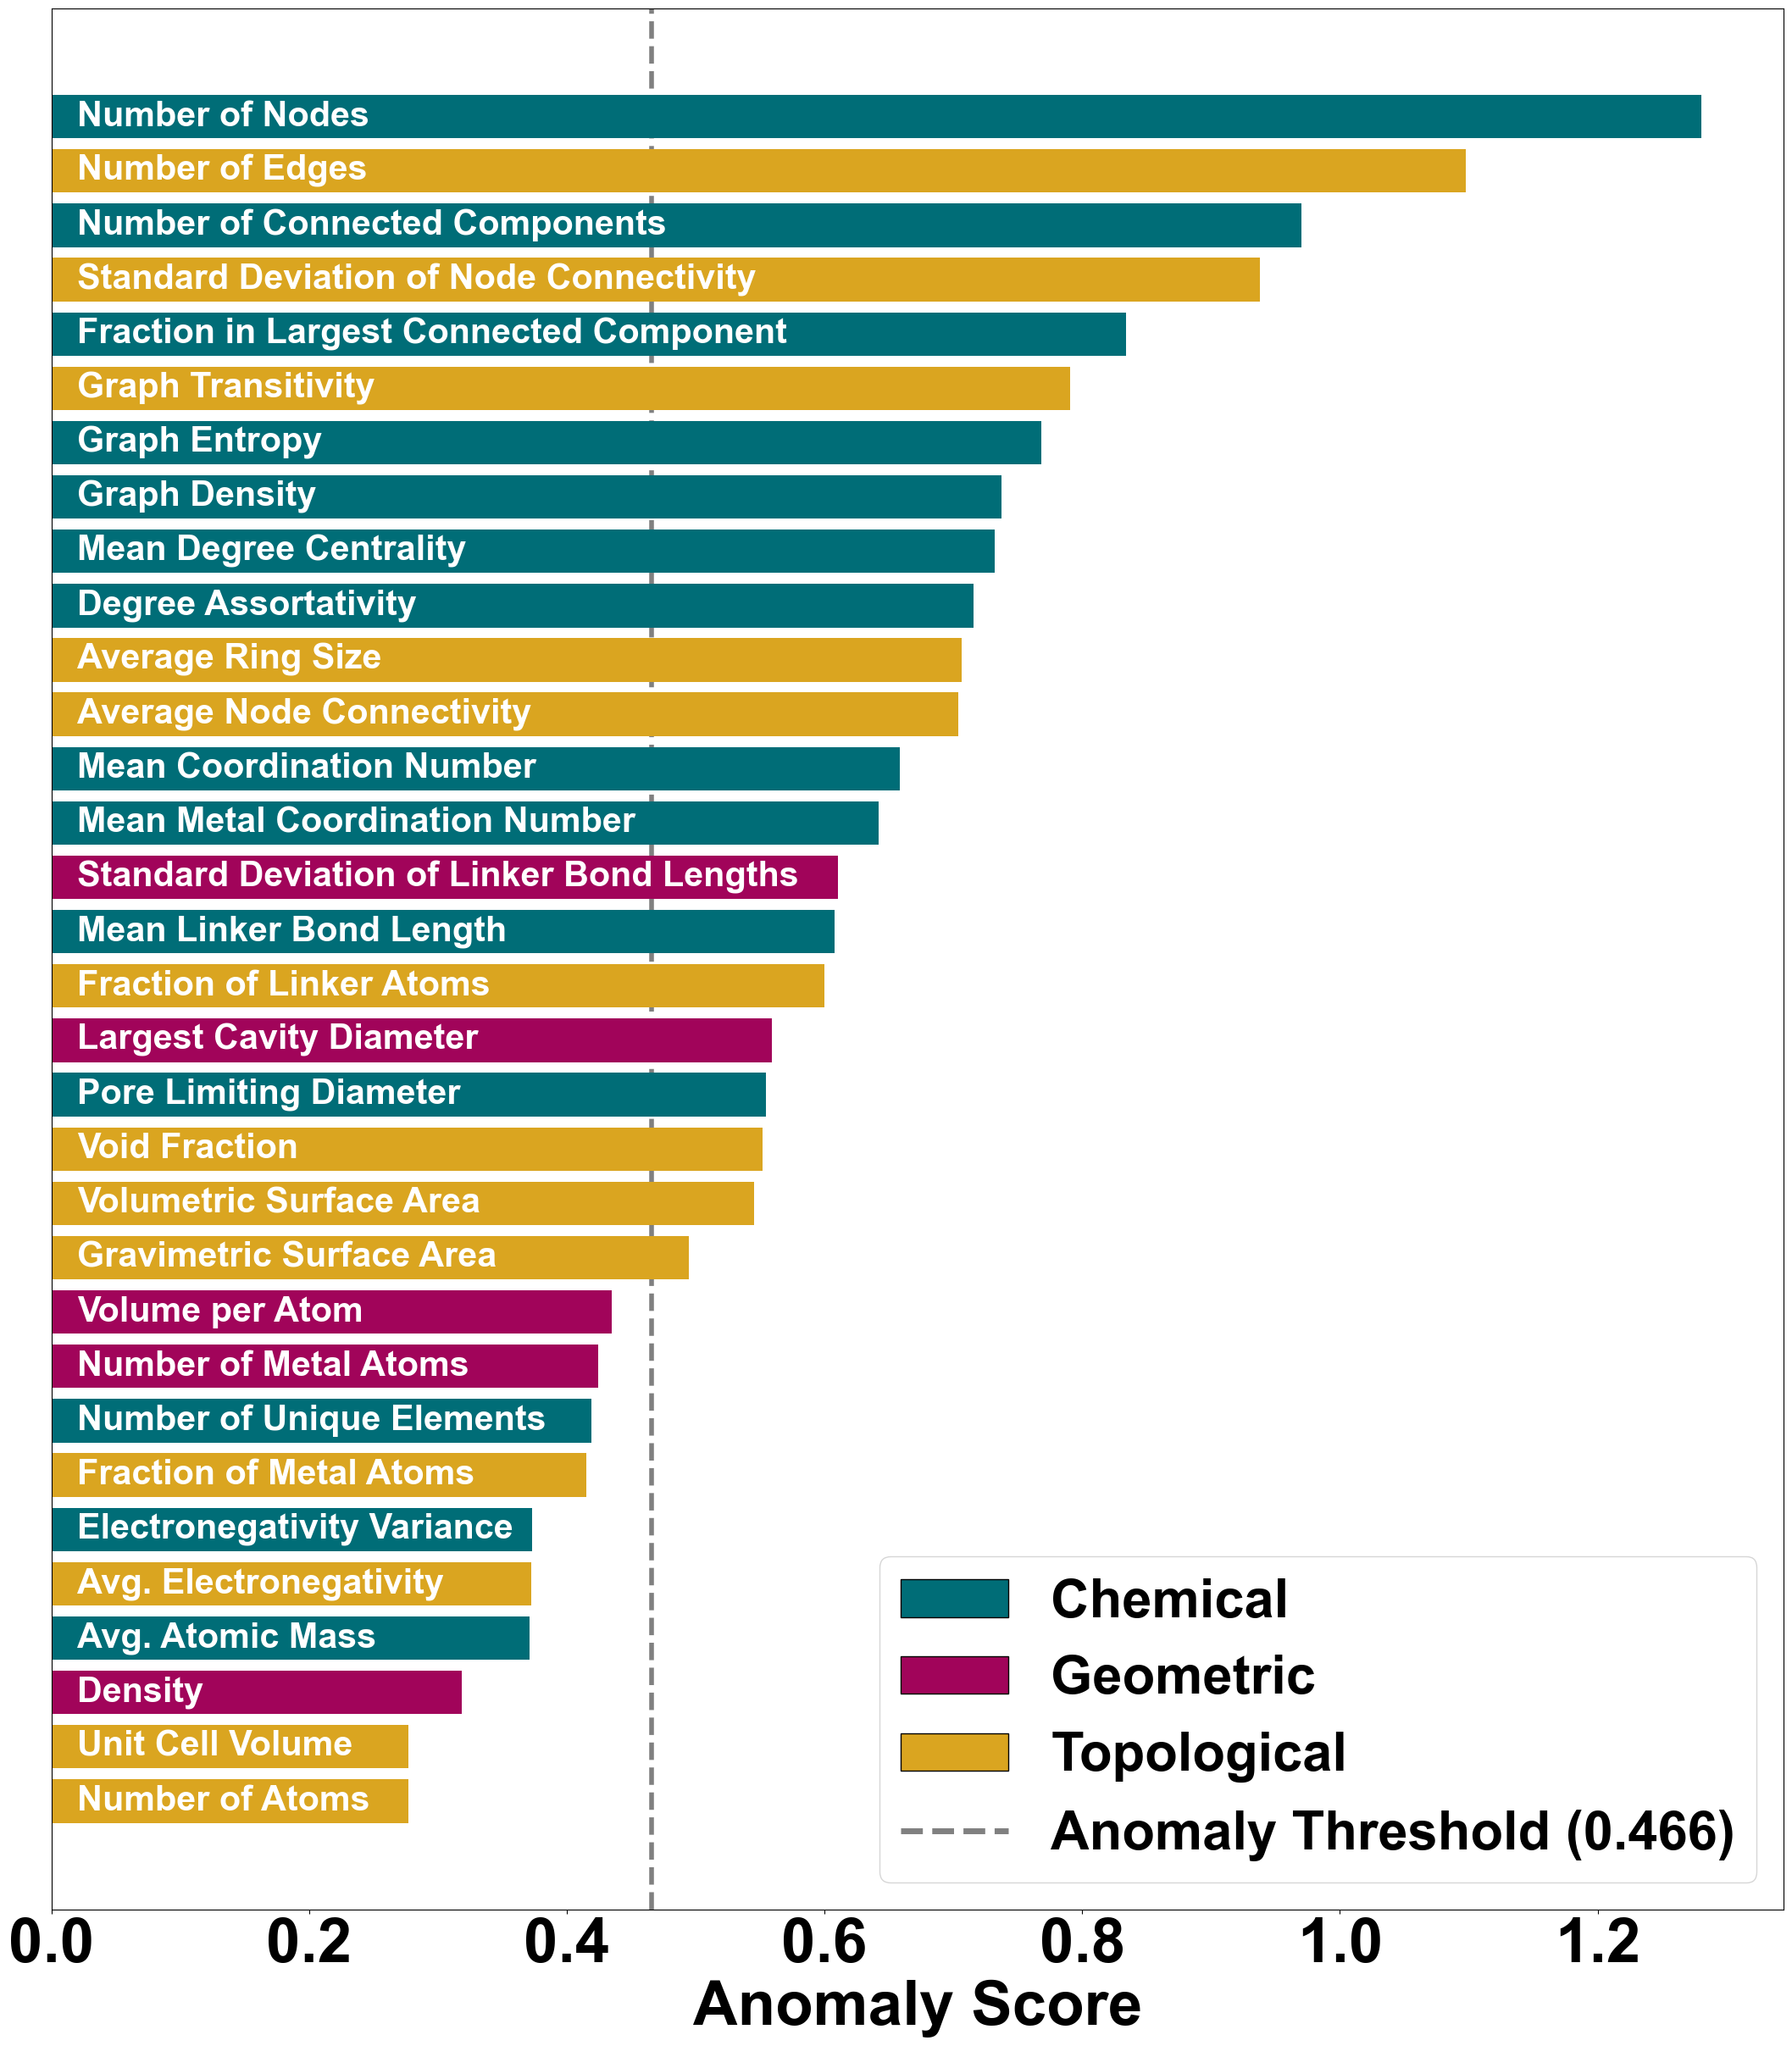

In [176]:
df_sorted = df.sort_values('Anomaly Score', ascending=True)
fig, ax = plt.subplots(figsize=(22, 25))

# Create the horizontal bar plot
ax.axvline(x=anomaly_threshold, color='gray', linestyle='--', linewidth=4,zorder=0)

bars =ax.barh(
    df_sorted['Cleaned Feature'],
    df_sorted['Anomaly Score'],
    color=df_sorted['Category'].map(colors) # Map category to color for each bar
)

# Add the vertical threshold line

# Set labels and title
ax.set_xlabel('Anomaly Score')


ax.set_yticks([]) # Hide the y-axis ticks and labels
ax.set_ylabel('')

legend_patches = [Patch(facecolor=color, edgecolor='black', label=category) for category, color in colors.items()]
legend_line = plt.Line2D([0], [0], color='gray', linestyle='--', linewidth=5, label=f'Anomaly Threshold ({anomaly_threshold})')
legend_patches.append(legend_line)

ax.legend(handles=legend_patches, loc='lower right',fontsize=m*13)
for bar, name in zip(bars, publishable_descriptors):
    # ax.text() places text at a specific coordinate on the plot.
    ax.text(
        0.02,  # X-coordinate: a small offset from the left edge.
        bar.get_y() + bar.get_height() / 2, # Y-coordinate: the vertical center of the bar.
        name, # The text to display (the name from your list).
        ha='left',         # Horizontal alignment.
        va='center',       # Vertical alignment.
        color='white',     # Text color (use 'white' for dark bars),       # Font size.
        fontweight='bold',
        fontsize=m*8.5,
        # Make the text bold for better visibility.
    )
    
    
plt.tight_layout()


plt.savefig('Figs/fig8_feature_contrib_heatmap.pdf',bbox_inches='tight')

In [66]:
dg=dff.sort_values('anomaly_score', ascending=True)
top_50_anomalies = dg.sort_values(by='anomaly_score', ascending=False).head(50)

bestmofs=top_50_anomalies.iloc[:,3:3+32]
bestmofs.columns=ss

In [65]:
ss=[
    'Num Atoms',
    'Cell Volume',
    'Density',
    'Avg Atomic Mass',
    'Avg Electronegativity',
    'Electronegativity Var',
    'Metal Fraction',
    'Num Unique Elements',
    'Num Metal Atoms',
    'Atom Volume',
    'Grav. Surface Area',
    'Vol. Surface Area',
    'Void Fraction',
    'Pore Limit Diam.',
    'Largest Cavity Diam.',
    'Linker Fraction',
    'Mean Linker Length',
    'StDev Linker Length',
    'Mean Metal Coord.',
    'Mean Coord. Num.',
    'Avg Node Connectivity',
    'Avg Ring Size',
    'Degree Assortativity',
    'Mean Degree Centrality',
    'Graph Density',
    'Graph Entropy',
    'Graph Transitivity',
    'Largest Comp. Fraction',
    'StDev Node Connectivity',
    'Num Connected Comp.',
    'Num Edges',
    'Num Nodes'
]

In [72]:
m=4

params = {
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],

    # Font sizes
    "axes.labelsize": 10*m,
    "font.size": 10*m,
    "legend.fontsize": 10*m,
    "xtick.labelsize": 10*m,
    "ytick.labelsize": 9*m,

    # Style for axis labels (xlabel, ylabel)
    'axes.labelweight': 'bold',
    'axes.labelcolor': 'black',

    # General styles for other elements
    'font.weight': 'bold',       # Makes title, etc., bold
    'xtick.color': 'black',      # Sets tick label color
    'ytick.color': 'black',
    'legend.labelcolor': 'black'
}

plt.rcParams.update(params)

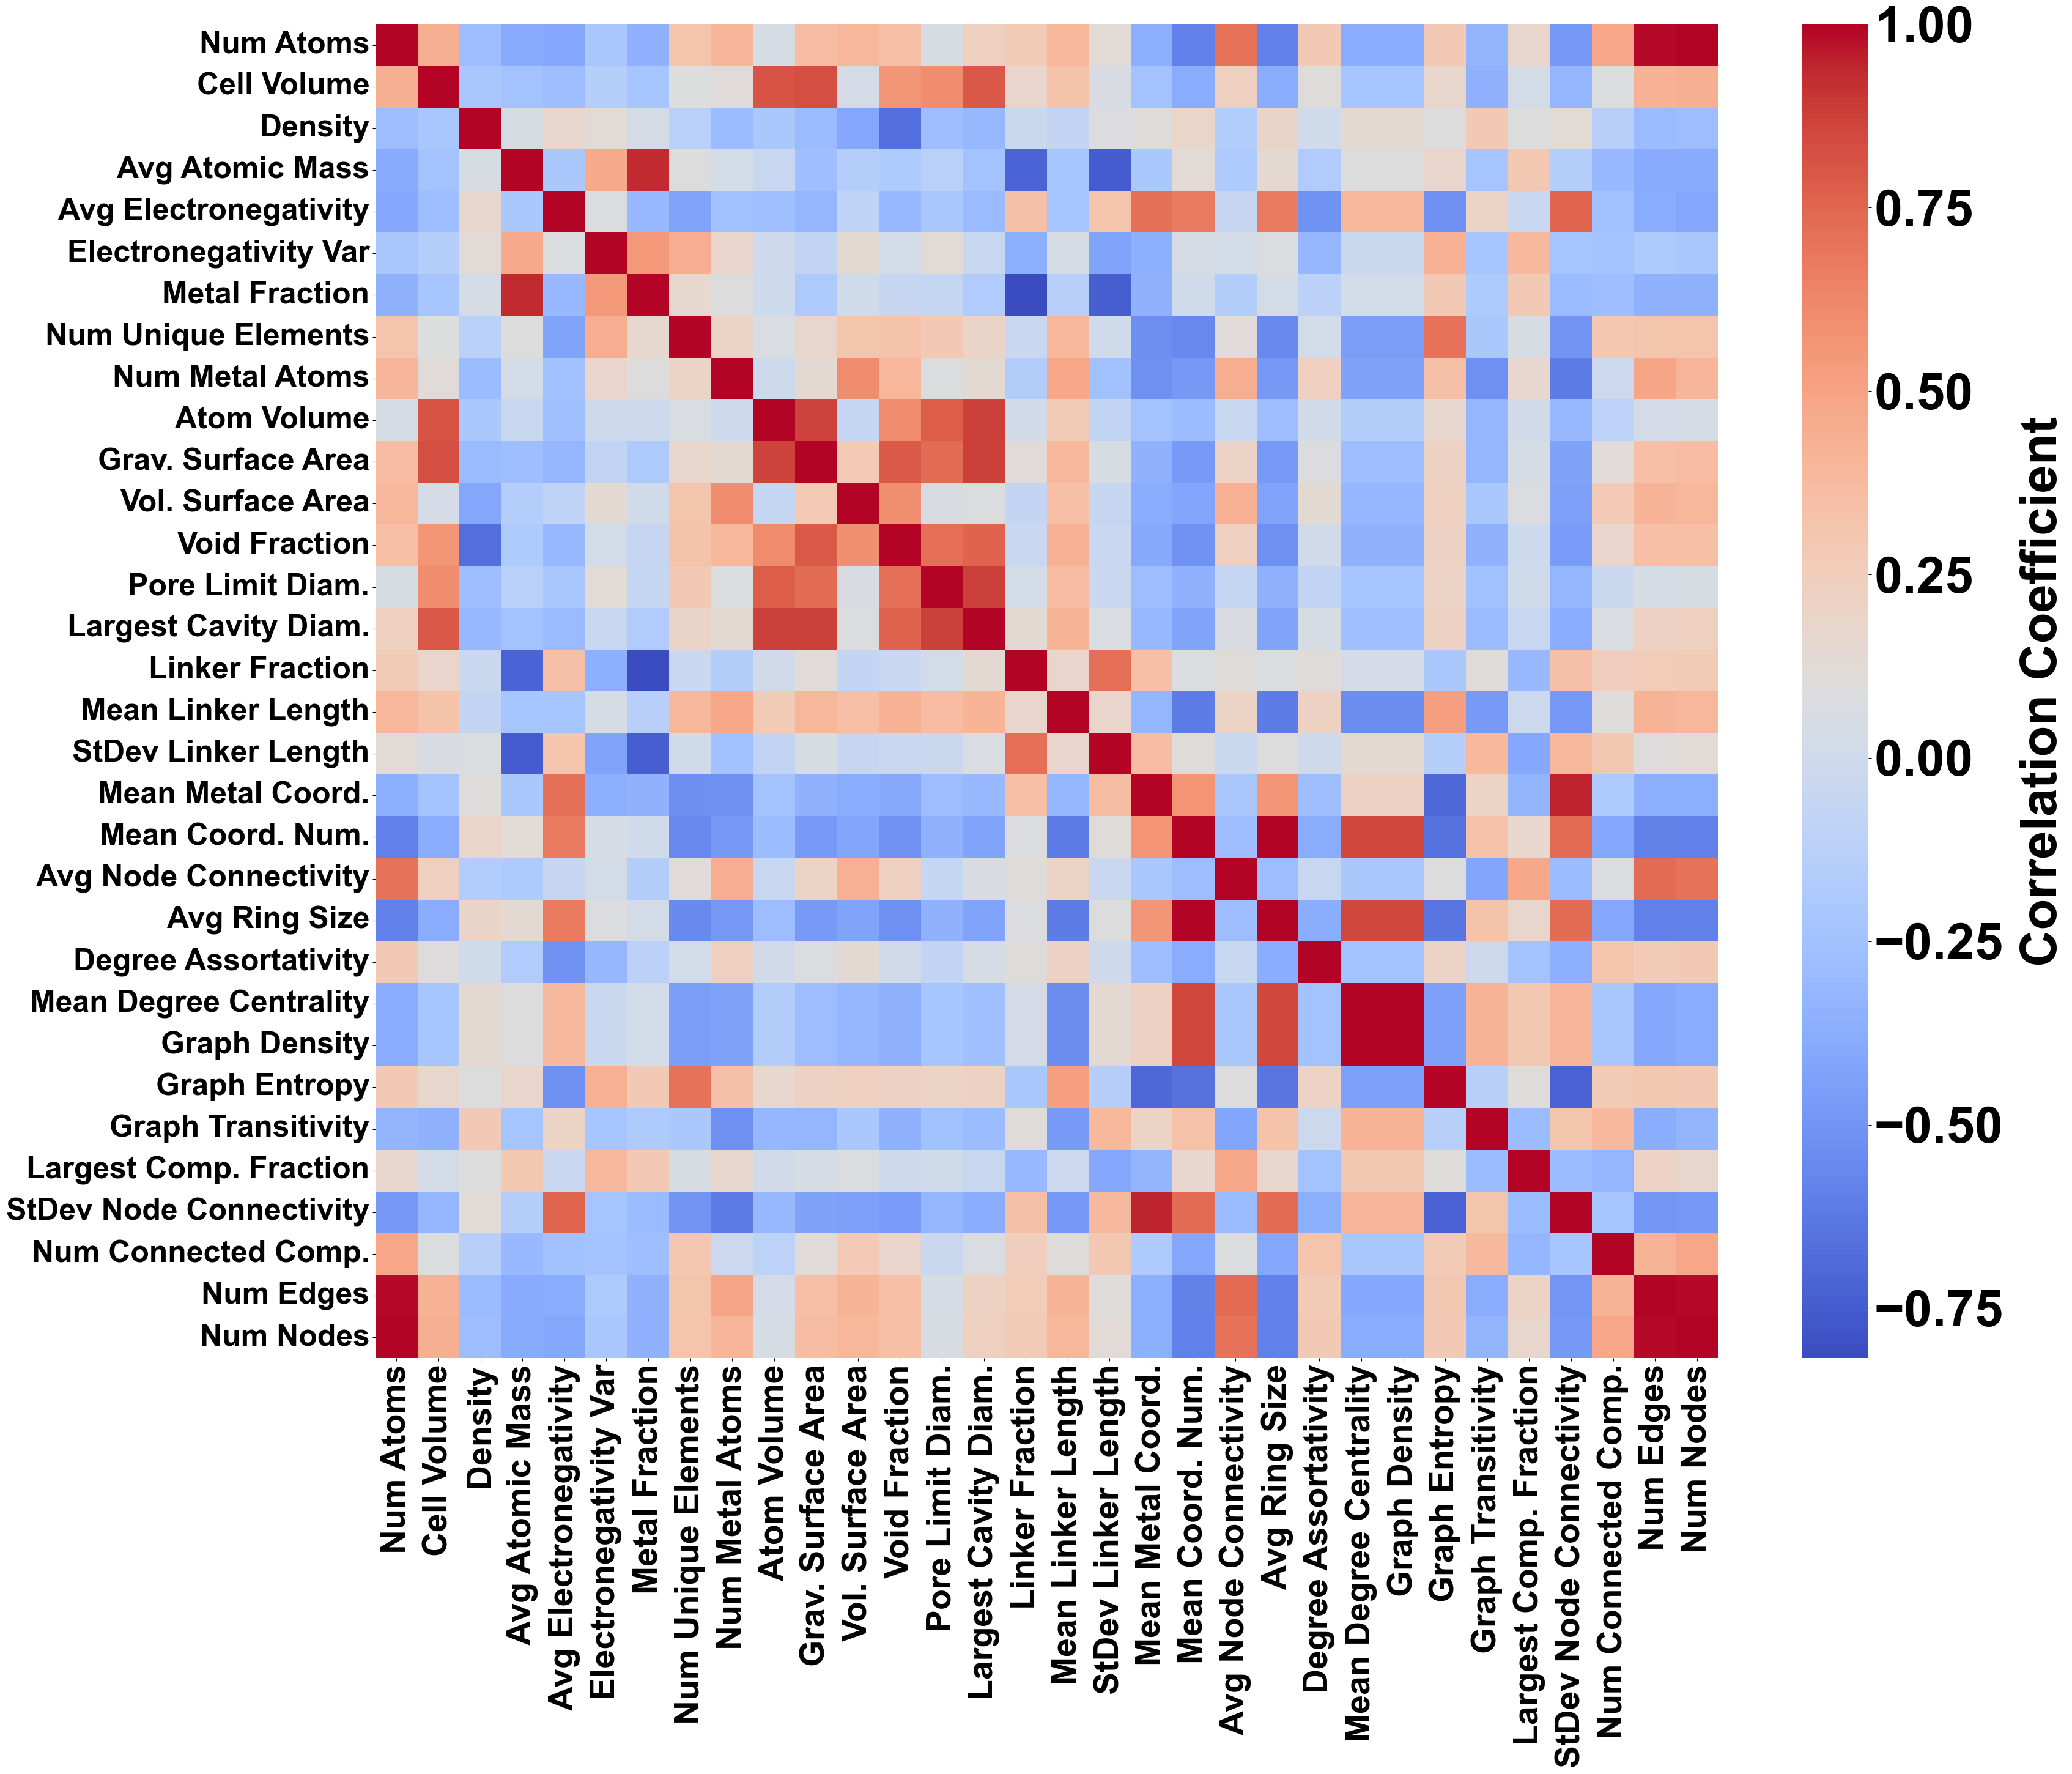

In [73]:
corr_matrix = bestmofs.corr()



plt.figure(figsize=(35, 30))

# Generate the heatmap.
ax = sns.heatmap(
    corr_matrix, 
    annot=False,          # Keep this False for a high number of columns
    cmap='coolwarm',      # A divergent colormap is great for correlations

)
cbar = ax.collections[0].colorbar

# Set the title for the colorbar
cbar.set_label('Correlation Coefficient', fontsize=60, weight='bold', labelpad=20)

# Set the font size and weight for the colorbar tick labels
cbar.ax.tick_params(labelsize=60) # Sets the font size
for label in cbar.ax.get_yticklabels(): # Sets the font weight to bold
    label.set_weight('bold')


plt.tight_layout()
plt.savefig('Figs/heatmap.pdf')

In [76]:
threshold=0.4666

In [178]:
m=3.5

params = {
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],

    # Font sizes
    "axes.labelsize": 10*m,
    "font.size": 10*m,
    "legend.fontsize": 10*m,
    "xtick.labelsize": 10*m,
    "ytick.labelsize": 9*m,

    # Style for axis labels (xlabel, ylabel)
    'axes.labelweight': 'bold',
    'axes.labelcolor': 'black',

    # General styles for other elements
    'font.weight': 'bold',       # Makes title, etc., bold
    'xtick.color': 'black',      # Sets tick label color
    'ytick.color': 'black',
    'legend.labelcolor': 'black'
}

plt.rcParams.update(params)

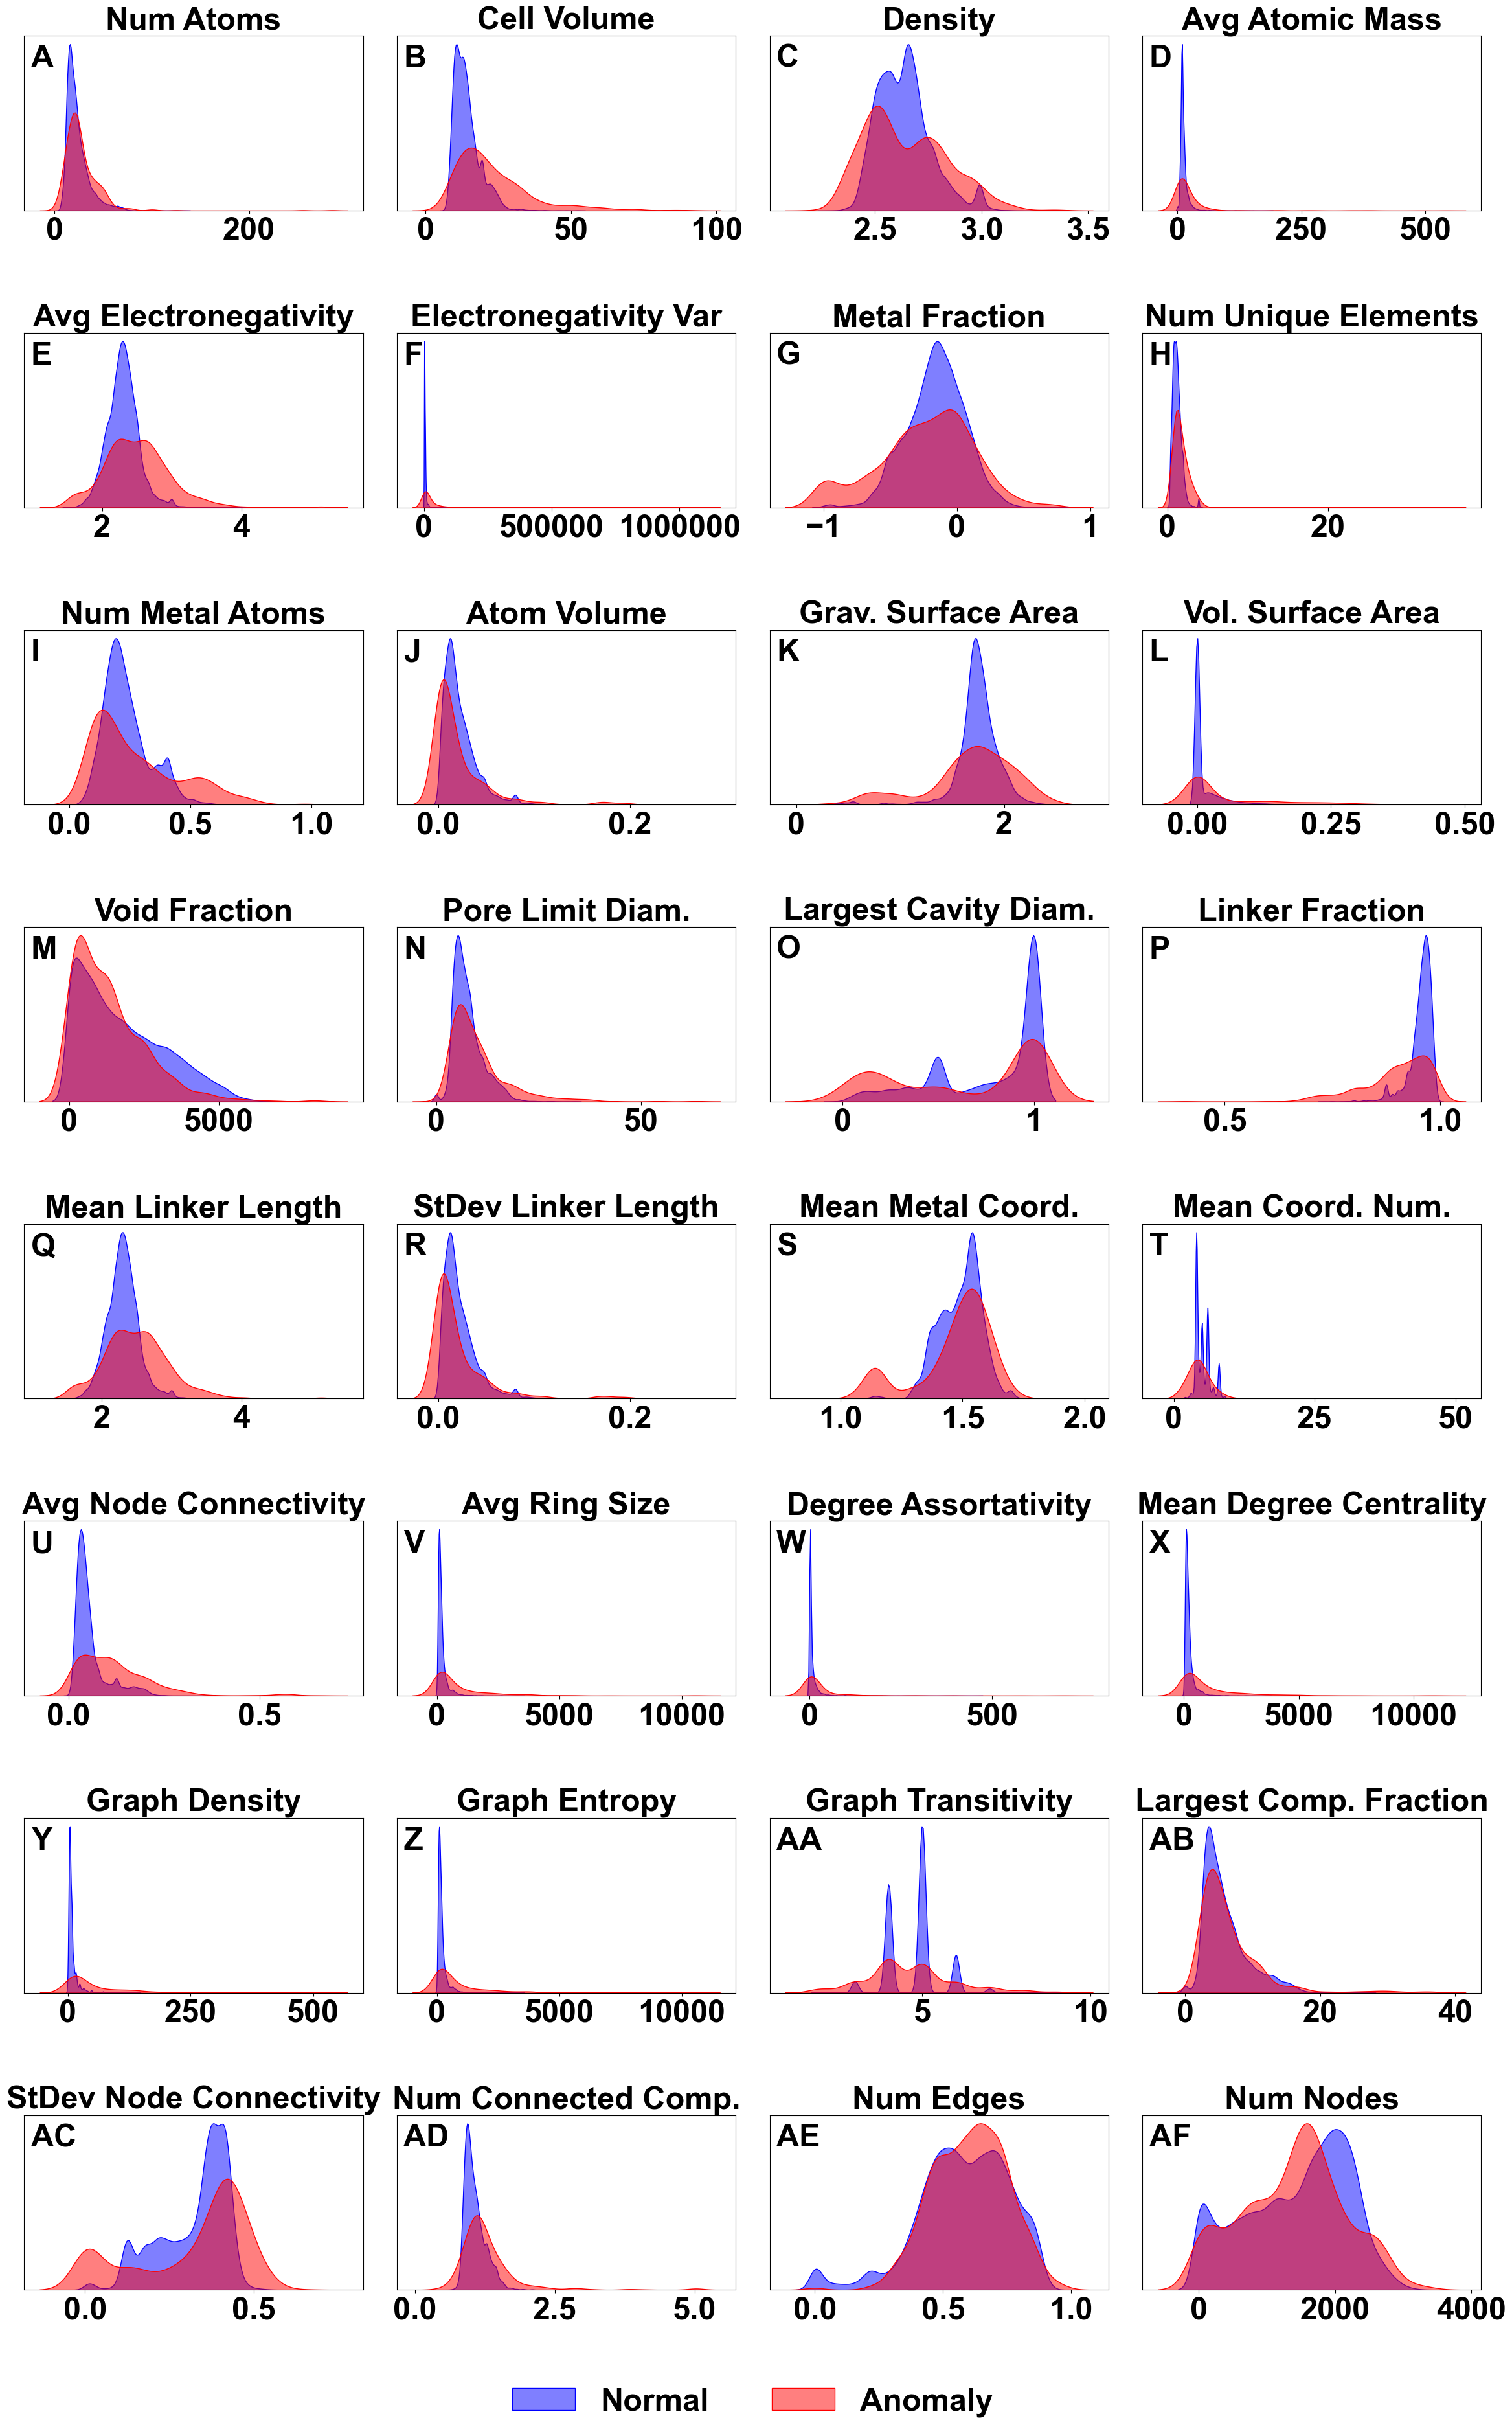

In [189]:
ss = [
    'Num Atoms', 'Cell Volume', 'Density', 'Avg Atomic Mass', 
    'Avg Electronegativity', 'Electronegativity Var', 'Metal Fraction', 
    'Num Unique Elements', 'Num Metal Atoms', 'Atom Volume', 
    'Grav. Surface Area', 'Vol. Surface Area', 'Void Fraction', 
    'Pore Limit Diam.', 'Largest Cavity Diam.', 'Linker Fraction', 
    'Mean Linker Length', 'StDev Linker Length', 'Mean Metal Coord.', 
    'Mean Coord. Num.', 'Avg Node Connectivity', 'Avg Ring Size', 
    'Degree Assortativity', 'Mean Degree Centrality', 'Graph Density', 
    'Graph Entropy', 'Graph Transitivity', 'Largest Comp. Fraction', 
    'StDev Node Connectivity', 'Num Connected Comp.', 'Num Edges', 'Num Nodes'
]


old_names = dff.columns[3:35]
rename_dict = dict(zip(old_names, ss))
dff = dff.rename(columns=rename_dict)


threshold = 0.4666
is_anomaly = dff['anomaly_score'] > threshold

anomaly_df = dff[is_anomaly]
normal_df = dff[~is_anomaly]



columns_to_plot = dff.columns[3:35]

sorted_columns = sorted(columns_to_plot)



fig, axes = plt.subplots(8, 4, figsize=(25, 40))
axes = axes.flatten()

for i, col in enumerate(sorted_columns):
    ax = axes[i]
    

    sns.kdeplot(data=normal_df, x=col, color='blue', fill=True, alpha=0.5, label='Normal', ax=ax)
    

    sns.kdeplot(data=anomaly_df, x=col, color='red', fill=True, alpha=0.5, label='Anomaly', ax=ax)
    
    
    div = i // 26
    mod = i % 26
    if div == 0:
        title_letter = chr(ord('A') + mod)
    else:
        first_letter = chr(ord('A') + div - 1)
        second_letter = chr(ord('A') + mod)
        title_letter = f"{first_letter}{second_letter}"
    if title_letter=='F':
        ax.ticklabel_format(style='plain', axis='x')
    ax.set_title(f'{ss[i]}', loc='Center', fontweight='bold', color='black',fontsize=35)
    
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    #ax.set_xticks([])
    ax.set_yticks([])
    ax.text(
    x=0.02,  
    y=0.95, 
    s=title_letter, 
    transform=ax.transAxes,  
    fontsize=35,
    fontweight='bold',
    color='k',
    verticalalignment='top', 
    horizontalalignment='left'
        )

handles, labels = axes[0].get_legend_handles_labels()

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=2, frameon=False)


fig.subplots_adjust(bottom=0.08, hspace=0.7, wspace=0.1, left=0.05, right=0.95, top=0.95)
plt.savefig('Figs/kde_normal_vs_anomal.pdf')
